In [38]:
import tensorflow as tf
import keras
import numpy as np

In [23]:
# Load the MNIST data
from keras._tf_keras.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images = train_images/255.0
test_images = test_images/255.0

In [25]:
# Reshape images to add channel dimension
import keras._tf_keras


train_images = train_images.reshape((-1, 28, 28, 1)) 
test_images = test_images.reshape((-1, 28, 28, 1))    

# One-hot encode the labels
train_labels = keras._tf_keras.keras.utils.to_categorical(train_labels, 10)  
test_labels = keras._tf_keras.keras.utils.to_categorical(test_labels, 10)    

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),                                            # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),                          # Another convolutional layer
    MaxPooling2D((2, 2)),                                            # Another max pooling layer
    Flatten(),                                                       # Flatten to a 1D vector
    Dense(128, activation='relu'),                                   # Fully connected layer
    Dropout(0.5),                                                    # Dropout for regularization
    Dense(10, activation='softmax')                                  # Output layer (10 classes)
])

c:\Users\User\Desktop\projects\AI2\LinearRegression\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9989 - loss: 0.0101 - val_accuracy: 0.9932 - val_loss: 0.5069
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9990 - loss: 0.0109 - val_accuracy: 0.9920 - val_loss: 0.4806
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9987 - loss: 0.0198 - val_accuracy: 0.9937 - val_loss: 0.5664
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9993 - loss: 0.0076 - val_accuracy: 0.9932 - val_loss: 0.4612
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9990 - loss: 0.0088 - val_accuracy: 0.9928 - val_loss: 0.3922
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9986 - loss: 0.0084 - val_accuracy: 0.9928 - val_loss: 0.3885
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9989 - loss: 0.0072 - val_accuracy: 0.9925 - val_loss: 0.8250
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9986 - loss

In [35]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.9920 - loss: 0.3559
Test Accuracy: 99.20%


In [36]:
model.save('digit_recognition_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


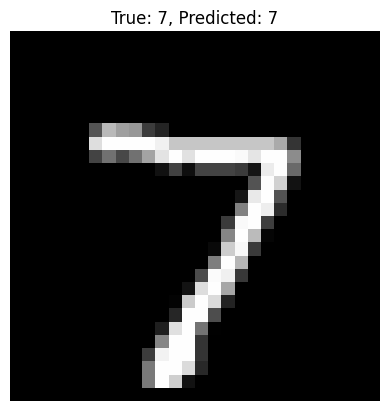

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


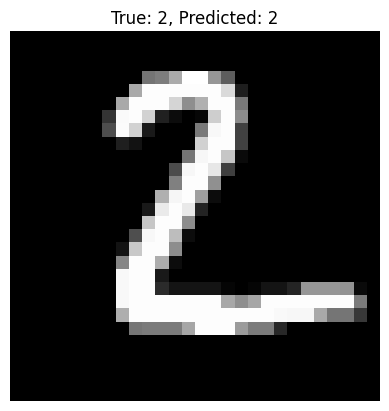

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


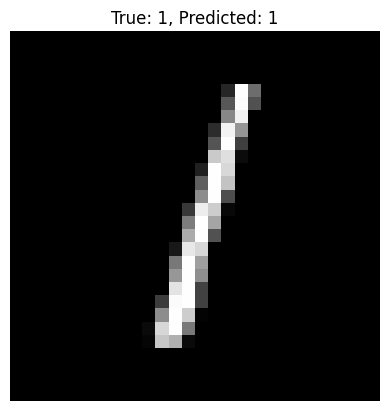

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


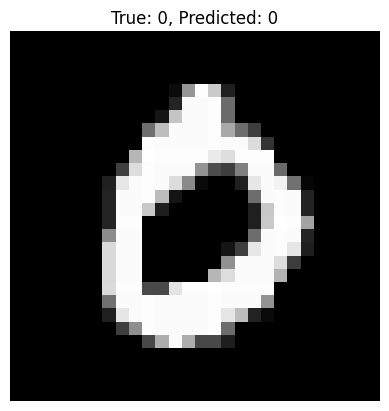

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


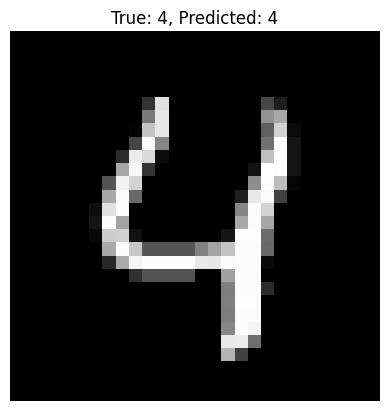

In [39]:
import matplotlib.pyplot as plt

# Plot a few test images with predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(test_labels[i])
    predicted_label = np.argmax(model.predict(test_images[i].reshape(1, 28, 28, 1)))
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()